In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from hyppo.ksample import KSample

In [2]:
FILE = "Measurements_for_Jung_et_al_2020.xlsx"
data = pd.read_excel(FILE, skiprows=1)
control, ltp = np.hsplit(np.array(data), 2)
control = control[~np.isnan(control)].reshape(-1, 1)

In [3]:
control.shape, ltp.shape

((90, 1), (98, 1))

In [4]:
# 2 sample tests
tests = ["CCA", "Dcorr", "HHG", "RV", "Hsic", "MGC"]
for test in tests:
    stat, pvalue = KSample(test).test(control, ltp, workers=-1)[:2]
    print(test, stat, pvalue)

CCA 0.0023097289105240113 0.494
Dcorr -0.0013414863816559772 0.38717348106686533
HHG 16405.87976474408 0.434
RV 0.0023097289105240113 0.516
Hsic -4.603180859139892e-05 0.3194136178415945
MGC -0.0013388652298702483 0.434


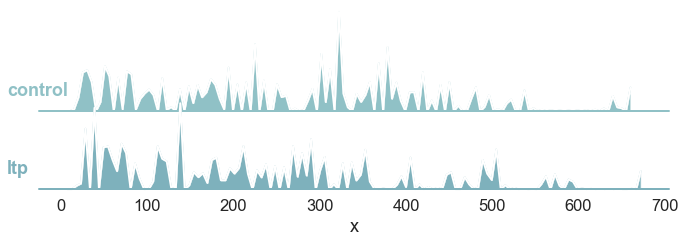

In [55]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

x = np.concatenate([control, ltp]).reshape(-1)
n1 = control.size
n2 = ltp.size
g = np.concatenate([np.repeat("control", n1), np.repeat("ltp", n2)])
df = pd.DataFrame(dict(x=x, g=g))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=5, height=2, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-.05, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.show()